### Name : Paul Francis
### Student ID : 21034542

In [1]:
#importing packages
import pandas as pd 
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import scipy.optimize as opt
from sklearn.cluster import KMeans
from scipy.stats import norm
import seaborn as sns
from scipy.optimize import curve_fit
import itertools as iter

In [2]:
# the list 'indicator' contains the indicator id's
# the list 'country_code' contains the code of a few countries
indicator1 = ["EN.ATM.CO2E.PC","EG.USE.ELEC.KH.PC"]
indicator2 = ["EN.ATM.METH.KT.CE","EG.ELC.ACCS.ZS"]
country_code = ['AUS','CHN','CAN','FRA','RUS','NZL','DEU','USA','ARG']

In [3]:
# function to read dataframe in world format and return 2 dataframe 
def read(indicator,country_code):
    df = wb.data.DataFrame(indicator, country_code, mrv=30)
    return df

In [4]:
# variable storing the csv file
path = "World Indicator Repository.csv"

In [5]:
# creating a dataframe using the function 'read'
dat  = read(indicator1, country_code)

In [6]:
# removing 'YR' and assigning new index names to dat
dat.columns = [i.replace('YR','') for i in dat.columns]      
dat=dat.stack().unstack(level=1)                             
dat.index.names = ['Country', 'Year']                           
dat.columns     

Index(['EG.USE.ELEC.KH.PC', 'EN.ATM.CO2E.PC'], dtype='object', name='series')

In [7]:
# creating a dataframe using the function 'read'
dat1  = read(indicator2, country_code)

In [8]:
# removing 'YR' and assigning new index names to dat2
dat1.columns = [i.replace('YR','') for i in dat1.columns]      
dat1=dat1.stack().unstack(level=1)                             
dat1.index.names = ['Country', 'Year']                           
dat1.columns

Index(['EG.ELC.ACCS.ZS', 'EN.ATM.METH.KT.CE'], dtype='object', name='series')

In [9]:
# resetting the index for dt1 and dt2
dt1 = dat.reset_index()
dt2 = dat1.reset_index()

In [10]:
# merging dt1 and dt2
dt = pd.merge(dt1, dt2)
dt

series,Country,Year,EG.USE.ELEC.KH.PC,EN.ATM.CO2E.PC,EG.ELC.ACCS.ZS,EN.ATM.METH.KT.CE
0,ARG,1991,1347.592046,3.183893,92.492188,105660.0
1,ARG,1992,1410.377544,3.201675,92.829453,107470.0
2,ARG,1993,1496.904499,3.268462,93.166046,106960.0
3,ARG,1994,1576.767198,3.308174,93.501274,108430.0
4,ARG,1995,1648.895228,3.267757,93.834465,108840.0
...,...,...,...,...,...,...
247,USA,2014,12993.965579,16.026379,100.000000,620810.0
248,USA,2015,NaN,15.535342,100.000000,617170.0
249,USA,2016,NaN,15.131747,100.000000,609200.0
250,USA,2017,NaN,14.805882,100.000000,614500.0


In [11]:
# dropping the column 'EG.USE.ELEC.KH.PC' and 'EG.ELC.ACCS.ZS'
dt.drop(['EG.USE.ELEC.KH.PC'], axis = 1, inplace = True)
dt.drop(['EG.ELC.ACCS.ZS'], axis = 1, inplace = True)

In [12]:
dt

series,Country,Year,EN.ATM.CO2E.PC,EN.ATM.METH.KT.CE
0,ARG,1991,3.183893,105660.0
1,ARG,1992,3.201675,107470.0
2,ARG,1993,3.268462,106960.0
3,ARG,1994,3.308174,108430.0
4,ARG,1995,3.267757,108840.0
...,...,...,...,...
247,USA,2014,16.026379,620810.0
248,USA,2015,15.535342,617170.0
249,USA,2016,15.131747,609200.0
250,USA,2017,14.805882,614500.0


In [13]:
# converting the data type of "Year" from object to int64
dt["Year"] = pd.to_numeric(dt["Year"])

In [14]:
# function to normalise the datas in the dataframe
def norm_df(df):
    y = df.iloc[:,2:]
    df.iloc[:,2:] = (y-y.min())/ (y.max() - y.min())
    return df

In [15]:
# normalised dataframe
dt_norm = norm_df(dt)
dt_norm

series,Country,Year,EN.ATM.CO2E.PC,EN.ATM.METH.KT.CE
0,ARG,1991,0.064064,0.060993
1,ARG,1992,0.065026,0.062488
2,ARG,1993,0.068642,0.062067
3,ARG,1994,0.070792,0.063281
4,ARG,1995,0.068604,0.063620
...,...,...,...,...
247,USA,2014,0.759328,0.486627
248,USA,2015,0.732744,0.483620
249,USA,2016,0.710894,0.477035
250,USA,2017,0.693253,0.481414


In [16]:
# dataframe that is needed to do clustering
df_fit = dt_norm.drop('Country', axis = 1)

In [17]:
# k means clustering
k = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(df_fit)

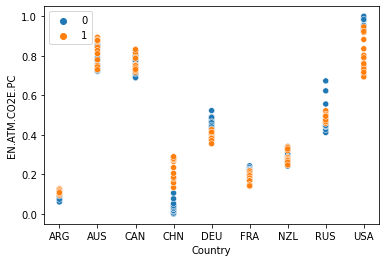

In [18]:
# clustering the different countries based on CO2 emission rate
sns.scatterplot(data=dt_norm, x="Country", y="EN.ATM.CO2E.PC", hue=k.labels_)
plt.legend()
plt.show()

In [19]:
# function to calculate the error range
def err_ranges(x, func, param, sigma):
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 

In [20]:
# dataframe containing the datas of the country Australia
dt1 = dt[(dt['Country'] == 'AUS')]
dt1

series,Country,Year,EN.ATM.CO2E.PC,EN.ATM.METH.KT.CE
28,AUS,1991,0.720832,0.102379
29,AUS,1992,0.722127,0.101900
30,AUS,1993,0.726300,0.099140
31,AUS,1994,0.736645,0.098173
32,AUS,1995,0.757474,0.096959
33,AUS,1996,0.777454,0.091109
34,AUS,1997,0.788592,0.092844
35,AUS,1998,0.839735,0.094430
36,AUS,1999,0.844355,0.103519
37,AUS,2000,0.849374,0.112194


Parameters are:  [-9.46583974e-04  3.79544241e+00 -3.80370264e+03]
Covariance is:  [[ 4.11029051e-09 -1.64781533e-05  1.65149596e-02]
 [-1.64781533e-05  6.60611253e-02 -6.62088962e+01]
 [ 1.65149596e-02 -6.62088962e+01  6.63572124e+04]]


/var/folders/1k/2dy8_tcd6tn7smj8lh3zjqkw0000gn/T/ipykernel_33963/2017871200.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1["pop_log"] = fct(x, *prmet)


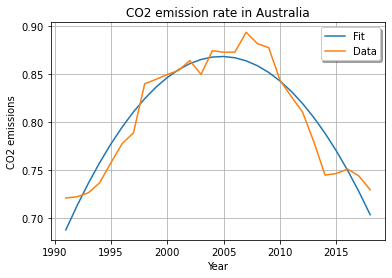

In [21]:
#curve_fit function implementation for Australia which has a medium CO2 emission

val = dt1.values
x, y = val[:, 1], val[:, 2]

def fct(x, a, b, c):
    return a*x**2+b*x+c
prmet, cov = opt.curve_fit(fct, x, y)

dt1["pop_log"] = fct(x, *prmet)
print("Parameters are: ", prmet)
print("Covariance is: ", cov)

plt.plot(x, dt1["pop_log"], label="Fit")
plt.plot(x, y, label="Data")
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('CO2 emissions')
plt.title("CO2 emission rate in Australia")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.show() 

In [22]:
# extract the sigmas from the diagonal of the covariance matrix
sigma = np.sqrt(np.diag(cov))
print(sigma)

low, up = err_ranges(x, fct, prmet, sigma)

[6.41115474e-05 2.57023589e-01 2.57598937e+02]


In [23]:
# Forcasting the emission rate in the coming 10 years
print("Forcasted CO2 emission")
low, up = err_ranges(2030, fct, prmet, sigma)
print("2030 between ", low, "and", up)

Forcasted CO2 emission
2030 between  -1043.2865577714929 and 1043.821638899185


We can see that the CO2 emmission rate in Australia first increased gradually to a rate of 0.89 in the year 2007 and then the decreased to a rate of 0.72 in the year 2018.
It is also evident that the year and the CO2 emission rate has a direct relationship.

In [24]:
# dataframe containing the datas of the country USA
dt2 = dt[(dt['Country'] == 'USA')]
dt2

series,Country,Year,EN.ATM.CO2E.PC,EN.ATM.METH.KT.CE
224,USA,1991,0.920623,0.609745
225,USA,1992,0.921671,0.608794
226,USA,1993,0.933203,0.594591
227,USA,1994,0.935504,0.600408
228,USA,1995,0.934060,0.589932
229,USA,1996,0.953396,0.583950
230,USA,1997,0.993284,0.570920
231,USA,1998,0.988899,0.554519
232,USA,1999,0.980174,0.542423
233,USA,2000,1.000000,0.534417


/var/folders/1k/2dy8_tcd6tn7smj8lh3zjqkw0000gn/T/ipykernel_33963/610109501.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2["pop_log"] = fct(x2, *prmet)


Parameters are:  [-7.70653363e-04  3.07922715e+00 -3.07488079e+03]
Covariance is:  [[ 9.39371558e-09 -3.76594141e-05  3.77435430e-02]
 [-3.76594141e-05  1.50977113e-01 -1.51314877e+02]
 [ 3.77435430e-02 -1.51314877e+02  1.51653887e+05]]


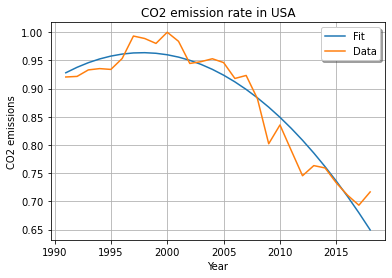

In [25]:
#curve_fit function implementation for USA which has a high CO2 emission

val2 = dt2.values
x2, y2 = val2[:, 1], val2[:, 2]

def fct(x, a, b, c):
    return a*x**2+b*x+c
prmet, cov = opt.curve_fit(fct, x2, y2)

dt2["pop_log"] = fct(x2, *prmet)
print("Parameters are: ", prmet)
print("Covariance is: ", cov)

plt.plot(x2, dt2["pop_log"], label="Fit")
plt.plot(x2, y2, label="Data")
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('CO2 emissions')
plt.title("CO2 emission rate in USA")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.show() 

In [26]:
# extract the sigmas from the diagonal of the covariance matrix
sigma = np.sqrt(np.diag(cov))
print(sigma)

low, up = err_ranges(x2, fct, prmet, sigma)

[9.69211823e-05 3.88557735e-01 3.89427640e+02]


In [27]:
# Forcasting the emission rate in the coming 10 years
print("Forcasted CO2 emission")
low, up = err_ranges(2030, fct, prmet, sigma)
print("2030 between ", low, "and", up)

Forcasted CO2 emission
2030 between  -1577.4374598421373 and 1577.7672247334017


We can see that the CO2 emmission rate in USA was high in the year 2000 and then the rate has been fluctuating between 0.96 and 0.71.
Here also the year and CO2 emission has direct relationship.

In [28]:
# dataframe containing the datas of the country China
dt3 = dt[(dt['Country'] == 'CHN')]
dt3

series,Country,Year,EN.ATM.CO2E.PC,EN.ATM.METH.KT.CE
84,CHN,1991,0.000000,0.587643
85,CHN,1992,0.004071,0.594740
86,CHN,1993,0.013139,0.599615
87,CHN,1994,0.017242,0.612909
88,CHN,1995,0.030307,0.633400
89,CHN,1996,0.027973,0.654394
90,CHN,1997,0.029392,0.627847
91,CHN,1998,0.032588,0.646107
92,CHN,1999,0.027790,0.655906
93,CHN,2000,0.035078,0.659145


Parameters are:  [ 1.75922825e-04 -6.92202748e-01  6.80783820e+02]
Covariance is:  [[ 8.07844646e-09 -3.23865194e-05  3.24588894e-02]
 [-3.23865194e-05  1.29838087e-01 -1.30128640e+02]
 [ 3.24588894e-02 -1.30128640e+02  1.30420267e+05]]


/var/folders/1k/2dy8_tcd6tn7smj8lh3zjqkw0000gn/T/ipykernel_33963/2300585509.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt3["pop_log"] = fct(x3, *prmet)


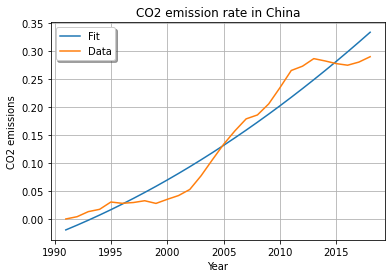

In [29]:
#curve_fit function implementation for China which has a low CO2 emission

val3 = dt3.values
x3, y3 = val3[:, 1], val3[:, 2]

def fct(x, a, b, c):
    return a*x**2+b*x+c
prmet, cov = opt.curve_fit(fct, x3, y3)

dt3["pop_log"] = fct(x3, *prmet)
print("Parameters are: ", prmet)
print("Covariance is: ", cov)

plt.plot(x3, dt3["pop_log"], label="Fit")
plt.plot(x3, y3, label="Data")
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('CO2 emissions')
plt.title("CO2 emission rate in China")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.show() 

In [30]:
# extract the sigmas from the diagonal of the covariance matrix
sigma = np.sqrt(np.diag(cov))
print(sigma)

low, up = err_ranges(x3, fct, prmet, sigma)

[8.98801784e-05 3.60330524e-01 3.61137462e+02]


In [31]:
# Forcasting the emission rate in the coming 10 years
print("Forcasted CO2 emission")
low, up = err_ranges(2030, fct, prmet, sigma)
print("2030 between ", low, "and", up)

Forcasted CO2 emission
2030 between  -1462.4230406425686 and 1463.5682655502064


The emission rate in China has been increasing from the year 1991 until now. But when compared to the other two countries, it is seen that China has the lowest emission rate.
In this case also, the year and CO2 emission has a direct relationship.